Plano de hoje
-------------

1. Ambiente de programação
2. Usando o computador para calcular    
3. Usando o computador para desenhar
4. Usando o computador para integrar: quadraturas
    1. **Fórmula do ponto médio e dos trapézios (Seções 4.3.1 e 4.3.2)**

# Integrais

A derivada de uma função (conhecida "explicitamente") sempre pode ser obtida aplicando-se as diversas regras de derivação.
Assim, até um computador pode calcular _algebricamente_ a derivada de expressões explícitas _arbitrariamente complexas_, como
$$f(x) = \exp(x^3 - \log^2(x)) + \frac{\sin(\tan(1-x))}{\cos(\cos(x) - 2) + 1}.$$

Mas para integrais não é tão simples obter expressões analíticas explícitas.
De fato, desde [um teorema de Liouville de 1835][1],
sabemos que existem funções cuja integral não pode ser expressa em "termos simples".
Por exemplo $f(x) = \exp(-x^2)$ é bastante "simples" em sua expressão, mas não tem uma "integral simples".

[1]: https://en.wikipedia.org/wiki/Liouville%27s_theorem_(differential_algebra)

Portanto, possuir métodos para calcular derivadas numericamente é ainda mais importante.
E, felizmente, há diversos métodos, com bastante precisão.

# Integrais = somas de Riemann

Vamos, aqui, nos concentrar no caso mais simples, mas também mais importante,
do cálculo de uma integral _definida_ de uma função contínua: $$I = \int_a^b f(x) \, dx. $$

Uma tal integral é o limite das _somas de Riemann_: $\int f = \lim_{n\to\infty} S_n$, onde
$$S_n = \sum _ {k = 0}^{n-1} f(x_k) \cdot (d_k - c_k)$$
onde $x_k$ será um ponto do intervalo $J_k = [c_k, d_k]$.
Não apenas devemos ter um número cada vez maior de intervalos,
mas o tamanho deles também deve diminuir:
só garantimos que o limite existe quando o _maior comprimento_ dos intervalos $J_k$ tender a zero.

Assim como fizemos para a derivada, onde "paramos" o limite antes de obter $h = 0$,
vamos também, para a integral, calcular apenas $S_n$ para um $n$ suficientemente grande.
E, também como fizemos para a derivada, vamos usar $h$ como variável principal.
Aqui, $h$ será este "maior comprimento".

## Uma fórmula de Cauchy

Resta, então, ter um critério para escolher os intervalos $J_k$ e os pontos $x_k \in J_k$.
O mais natural para os $J_k$ é tomar todos eles "iguais", ou seja:
$$ c_k = a + kh \quad \text{e}\quad d_k = c_k + h, \qquad \text{onde } h = \frac{b-a}{n}.$$

Já para os $x_k$, o primeiro critério (historicamente) foi dado por Cauchy: $x_k = c_k$.
(Riemann mostrou que não precisávamos de _nenhuma_ regra para os $x_k$:
conquanto os intervalos diminuíssem e a função fosse contínua,
as somas $S_n$ convergiriam para a sua integral.
Mas isso não nos interessa aqui: **precisamos** dar uma regra para o computador poder calcular!)

### Exercício:
Implemente a soma de Cauchy.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Cauchy_n(f,a,b,n=100):
    h = (b-a)/n
    Sn = sum([f(a+k*h)*h for k in arange(0,n)])
    return Sn

# Análise de erro

O reflexo básico de toda esta seção será analisar como o erro $S_n - I$ tende a zero quando $n \to \infty$,
ou, o que é o mesmo, quando $h \to 0$.

## Decomposição

A primeira observação quanto ao erro é que este pode ser decomposto em uma _soma_ de $n$ erros diferentes.
Isso porque, da aditividade da integral, temos:
$$\int_a^b f(x) \, dx = \sum _ {k=0}^{n-1} \left( \int _ {c_k}^{d_k} f(x) \, dx \right)
                      = \sum _ {k=0}^{n-1} I _ {n,k}$$
onde, introduzimos a notação $I _ {n,k}$ para as integrais em cada intervalo.
Isso dá uma decomposição de $I$ análoga à fórmula da soma de Cauchy, $S_n = \sum_{k=0}^{n-1} S_{n,k}$.

Assim, o _erro_ da soma de Cauchy será:
$$S_n - I = \sum_k \big( S _ {n,k} - I _ {n,k} \big) = \sum_k e _ {n,k}. $$
Obviamente, alguns erros podem ocorrer por excesso, e outros por falta,
mas devemos nos previnir - matematicamente - para a pior conspiração possível.

## Erro de um termo: análise dos $e_{n,k}$.

Como $f$ é contínua, o valor de $f(x)$ não varia muito dentro de um intervalo $J_k$.
Mais ainda, conforme este intervalo diminui, menor será a variação de $f(x)$.
A diferença entre o mínimo e o máximo de $f$ num intervalo $[x,y]$ é chamada de _oscilação_ de $f$ no intervalo,
muitas vezes denotada $\omega(f;x,y)$.

Lembre, além disso, que a integral é uma "área", e portanto conforme $h$ diminui,
também diminui o intervalo de integração, e com ele o valor da integral $I _ {n,k}$.
Portanto, o erro diminui por duas razões quando $h \to 0$: primeiramente,
porque a função oscila menos num intervalo menor,
segundo, porque a própria integral diminui de magnitude.

Como já estamos treinados para pensar em erros relativos,
percebemos que a diminuição importante do erro na integral
vem da menor oscilação, e não da "simples" redução do intervalo de integração.
Se a oscilação não diminuir, teremos um erro relativo essencialmente igual.

### Uma mudança de variáveis

Vamos aplicar uma mudança de variáveis na integral $I_{n,k}$
para que o intervalo de integração não dependa mais de $h$.
Isso nos dá uma fórmula mais simples para os erros $e_{n,k}$.

Primeiro, a integral:
$$I _ {n,k} = \int _ {c_k}^{d_k = c_k + h} f(x)\,dx
            = \int_0^1 f \big( c_k + th \big) \cdot h \, dt
            = h \int_0^1 f \big( c_k + th \big)  \, dt.$$
E agora, o erro:
$$e _ {n,k} = f(x_k) \cdot h - I _ {n,k} = h \int_0^1 \big( f(x_k) - f(c_k + th) \big) \, dt.$$

Podemos, daí, retirar uma estimativa do erro:
$$
\lvert e _ {n,k} \rvert
   \leq h \int_0^1 \bigl| f(x_k) - f(c_k + th) \bigr| \, dt
   \leq h \int_0^1 \omega(f; c_k, d_k) \, dt
   =    h \cdot \omega(f; c_k, d_k).
$$

## O erro total

Como vimos anteriormente, o erro é a soma dos erros de cada termo,
e poderia ocorrer que todos eles estivessem na mesma direção.
Por isso, no pior dos casos, temos que
$$
\left|S_n - I\right|
   \leq \sum _ {k=0}^{n-1} e _ {n,k}
   \leq h \sum _ {k=0}^{n-1} \omega(f; c_k, d_k).
$$

Como $f$ é contínua, quando $h \to 0$, cada um dos $\omega(f; c_k, d_k)$ diminui.
Iremos, na verdade, estimar ainda mais grosseiramente:
vamos usar $\omega(f;h)$,
que é o máximo da variação de $f$ sobre todos os intervalos de comprimento $h$ dentro de $[a,b]$.
A continuidade _uniforme_ de $f$ no intervalo $[a,b]$ inteiro garante que $\omega(f;h)$
também tende a zero quando $h\to0$.

Assim, temos, para nossa estimativa:
$$\left|S_n - I\right| \leq h \sum _ {k=0}^{n-1} \omega(f;h) = nh \, \omega(f;h).$$
Ora, da definição de $h$ temos que $b - a = nh$, logo:
$$E_n \leq (b-a) \cdot \omega\left(f; \frac{b-a}{n} \right). $$

Nesta fórmula, vemos bem que a importância de $n\to \infty$ (ou, equivalentemente, $h \to 0$)
reside na redução da oscilação da função, nos pequenos intervalos de discretização.
Além disso, como só usamos a _continuidade_ de $f$,
esta estimativa vale qualquer que seja o método de escolha dos pontos $x_k$.

### Exercício: erros de integração

Faça um gráfico do erro de integração de $f(x) = \sin(x)$ no intervalo $[0,\pi]$, em função do número de pontos utilizados.
Como você faria para estimar o erro ao integrar $\exp(-x^2)$ no intervalo $[0,1]$?

In [10]:
def f(x): return sin(x)
def g(x): return exp(-x**2)

def oscilacao(f,a,b,n=100):
    h = (b-a)/n
    return sum([abs(f(a+(k+1)*h)-f(a+k*h)) for k in arange(0,n)])

erro = lambda f,a,b,n=100 : oscilacao(f,a,b,n)*(b-a)/n

/usr/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


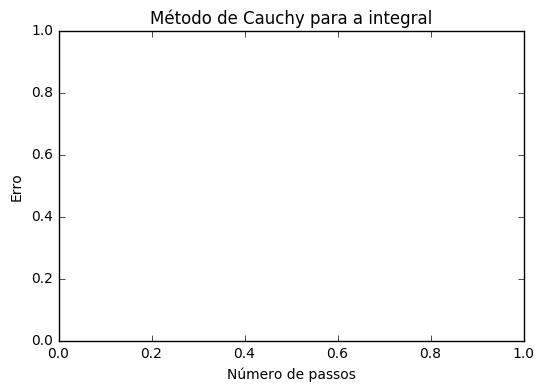

In [4]:
# E nesta faça os gráficos
xlabel('Número de passos')
ylabel('Erro')
title('Método de Cauchy para a integral')
legend(loc=0);

# Diminuindo o erro: a fórmula do valor médio e a fórmula dos trapézios

Vimos que o erro ao considerar somas de Riemann (na verdade, deveríamos chamar de "somas de Cauchy" estas que usam o ponto inicial)
tende a zero porque a oscilação da função diminui conforme o tamanho do intervalo considerado diminui.
Será que é possível (analogamente às diferenças centrais) obter fórmulas que convirjam mais rápido?

Em geral (ou seja, para funções apenas contínuas) isso não é possível,
pois a oscilação $\omega$ é o único mecanismo de controle que possuímos.
Mas, seguindo o princípio geral do curso, "mais derivadas = melhor convergência",
então vamos procurar métodos que nos dêem erros menores se supusermos que a função seja derivável.

Começamos com funções uma vez deriváveis.

## Erro, com derivadas

A primeira coisa a ser feita é estimar o erro da fórmula que já temos, supondo que $f$ seja derivável.
Começamos com as somas de Cauchy, onde $x_k = c_k$:
$$\begin{align}
e _ {n,k} & = h \cdot \left| f(c_k) - \int_0^1 f(c_k + th) \, dt \right|
     = h \cdot \left| \int_0^1 \big[ f(c_k) - f(c_k + th) \big] \, dt \right| \\
   & = h \cdot \left| \int_0^1 f'(\xi_t)(-th) \, dt \right|
     = h^2 \cdot \left| \int_0^1 f'(\xi_t) t \, dt \right| \\
   & \leq h^2 \cdot \int_0^1 \max \bigl| f'(\xi) \bigr| t \, dt
     =    h^2 \cdot \max \bigl| f'(\xi) \bigr| \cdot \int_0^1 t \, dt
     =    h^2 \cdot \max \bigl| f'(\xi) \bigr| \cdot \frac{1}{2}
\end{align}$$
onde usamos a fórmula do valor médio para derivada: $f(y) - f(x) = f'(\xi)(y - x)$ para algum $\xi \in (x,y)$.

Ao somar todos os $e _ {n,k}$, teremos então que o erro $E_n$ será, no máximo,
$$
\def\maxhalf{\frac{\max \bigl| f'(\xi) \bigr|}{2}}
E_n
  \leq \sum _ {k=0}^{n-1} e _ {n,k}
  \leq n \cdot h^2 \maxhalf
  \leq h \cdot (b - a) \maxhalf.
$$
Assim, o erro da "fórmula de Cauchy" decresce linearmente com $h$.

Obs: podemos obter esta estimativa da estimativa anterior e a seguinte relação:
a oscilação de $f$ num intervalo é sempre menor do que o máximo do valor absoluto da derivada $f'$
neste mesmo intervalo, vezes o comprimento do intervalo.

## Como diminuir o erro?

Para reduzir o erro, podemos apostar em duas vertentes.
Ou fazemos os erros $e _ {n,k}$ se compensarem, ou reduzimos os $e _ {n,k}$ diretamente.
A primeira estratégia depende muito da função considerada, então vamos tentar arrumar um outro método.
Em suma, gostaríamos de reduzir o erro
$$\big(\text{Estimativa de $f$ no intervalo $[c_k, d_k]$}\big) - \int_0^1 f(c_k + th) \, dt.$$

Inspirados pela fórmula das diferenças centrais, podemos pensar que, se calcularmos $f$ no meio do intervalo,
em vez de no bordo, o erro pode ser menor.
Ou seja, usaremos $f(\frac{c_k + d_k}{2})$ em vez de $f(c_k)$ como estimativa de $f$.
Assim, em vez de calcularmos $S_n$, calcularemos
$$M_n = \sum_{k=0}^{n-1} f \left(\frac{c_k + d_k}{2} \right) \cdot h.$$
Esta fórmula é conhecida como **fórmula do ponto médio**.

### Exercício:

- Supondo que $f$ seja **duas** vezes diferenciável, estime o erro cometido pela fórmula do ponto médio. Aqui, para aproveitar a simetria ao máximo, introduza $m_k = \frac{c_k + d_k}{2}$ e faça uma mudança de variáveis para o intervalo $[-1,1]$.
- Implemente a fórmula do ponto médio.
- Refaça os gráficos para as funções seno e gaussiana.

$$\begin{align}
e _ {n,k} & = \left(\frac{h}{2}\int _ {-1}^1 f(m_k + th/2) \, dt \right)- h \cdot f(m_k)
      = \frac{h}{2} \left( \int _ {-1}^1 f(m_k + th/2) - f(m_k) \, dt \right) \\
    & = \frac{h}{2} \left( \int _ {-1}^1 f'(m_k) \frac{th}{2} + \frac{f''(m_k)}{2} \left(\frac{th}{2}\right)^2 + o(h^2) \, dt \right)
      = \left( \frac{h}{2} \right)^3 \left( \int _ {-1}^1 \frac{f''(m_k)}{2} t^2 + o(1) \, dt \right) \\
    & = \left( \frac{h}{2} \right)^3 \left( \frac{f''(m_k)}{2} \int _ {-1}^1 t^2 \, dt + o(1) \right) \, dt
      = \left( \frac{h}{2} \right)^3 \left( \frac{f''(m_k)}{2} \frac{2}{3} + o(1) \right) \\
\text{Logo:} \qquad \\
E_n & = \sum_k e _ {n,k} \sim \left( \frac{h}{2} \right)^3 \left(\frac{f'(b) - f'(a)}{2h} \frac{2}{3} + o(1/h) \right) \\
    & = \left( \frac{h}{2} \right)^2 \frac{f'(b) - f'(a)}{6} + o(h^2)
\end{align}$$

A simplificação da soma na última linha segue da própria fórmula do ponto médio para $f''$.
Enfim, a estimativa de $\sum_k o(1)$ segue de $n \, o(1) = o(1/h)$ pois $nh = (b-a)$ está fixo.

Também é possível obter estimativas sem $o()$, usando o $\max f''$:

$$\begin{align}
\lvert e _ {n,k} \rvert
   & \leq \left( \frac{h}{2} \right)^3 \frac{\max \lvert f''(x) \rvert}{2} \frac{2}{3} \\
 E_n \leq \sum_k \lvert e _ {n,k} \rvert \leq n \, \max \lvert e _ {n,k} \rvert
   & \leq \frac{(b-a)}{2} \left(\frac{h}{2} \right)^2 \frac{\max \left| f''(x) \right|}{2} \frac{2}{3}.
\end{align}$$

In [5]:
def midpoint(f,a,b,n=100):
    pass

In [6]:
# Gere as estimativas das integrais

/usr/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


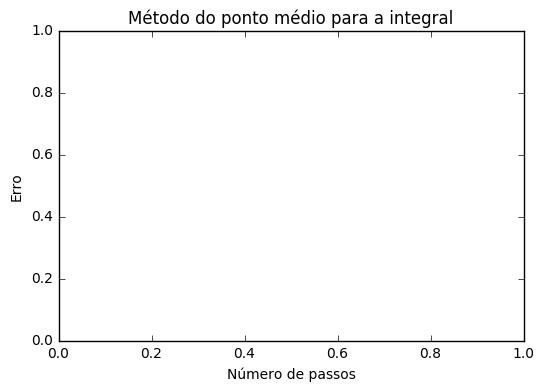

In [7]:
# E aqui faça os gráficos. Não se preocupe em obter as estimativas de erro.
xlabel('Número de passos')
ylabel('Erro')
title('Método do ponto médio para a integral')
legend(loc=0);

## A regra do trapézio

Outra idéia (também com cara de "simetria") para reduzir o erro é usar ambos pontos extremos em cada intervalo.
A "estimativa para $f$" será a média de $f$ em cada um destes pontos, o que dá
$$T_n
  = \sum _ {k=0}^{n-1} \left(\frac{f(c_k) + f(d_k)}{2}\right) \cdot h
  = \frac{f(a) + f(b)}{2} \cdot h + \sum _ {k=1}^{n-1} f(c_k) \cdot h.$$

### Estimativa de erro

Vamos primeiro estimar $\frac{f(c_k) + f(d_k)}{2}$.
Expandindo em série, temos $\displaystyle f(m_k) + \frac{f''(m_k)}{2} \frac{h^2}{4} + O(h^4)$.

Com isso, podemos calcular simplesmente o erro do método do trapézio.
Como já calculamos o erro $I_{n,k} - h \cdot f(m_k)$ no método do ponto médio,
basta subtrair $\displaystyle h \cdot \frac{f''(m_k)}{2} \left(\frac{h}{2}\right)^2$
do resultado lá obtido:
$$\begin{align}
e _ {n,k} & = \left( \frac{h}{2} \right)^3 \left( \frac{f''(m_k)}{2} \frac{2}{3} + o(1) \right)
              - h \cdot \frac{f''(m_k)}{2} \left(\frac{h}{2}\right)^2 \\
          & = \left( \frac{h}{2} \right)^3 \left( \frac{f''(m_k)}{2} \frac{2}{3} + o(1) - 2 \frac{f''(m_k)}{2} \right) \\
          & = \left( \frac{h}{2} \right)^3 \frac{f''(m_k)}{2} \left( \frac{-4}{3} \right) + o(h^3) \\
\text{Assim, da mesma forma:} \quad \\
E_n       & = - \left( \frac{h}{2} \right)^2 \frac{f'(b) - f'(a)}{3} + o(h^2)
\end{align}$$